In [45]:
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

from src.utils import prepare_data
from src.models import BaselineMajor, BaselineRuleBased


In [35]:
X_train, X_test, y_train, y_test = prepare_data('./data/dialog_acts.dat', drop_duplicates=False)
model = BaselineMajor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(preds, y_test)


0.40041819132253004

In [36]:
X_train, X_test, y_train, y_test = prepare_data('./data/dialog_acts.dat', drop_duplicates=True)
model = BaselineMajor()
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(preds, y_test)


0.5559701492537313

In [37]:
X_train, X_test, y_train, y_test = prepare_data('./data/dialog_acts.dat', drop_duplicates=False)
model = BaselineRuleBased()
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(preds, y_test)


0.6811291165708312

In [38]:
import pandas as pd

X_train, X_test, y_train, y_test = prepare_data('./data/dialog_acts.dat', drop_duplicates=True)
model = BaselineRuleBased()
model.fit(X_train, y_train)

y, levels = pd.factorize(y_test)
preds = model.predict(X_test)
accuracy_score(preds, y_test)


0.47761194029850745

In [39]:
preds.value_counts()

request     382
inform      282
negate       65
reqalts      38
hello        16
thankyou     13
confirm       5
restart       2
repeat        1
Name: sentence, dtype: int64

In [40]:
y_test.value_counts()

inform      447
request     135
reqalts      77
null         46
negate       25
affirm       24
confirm      17
thankyou     13
bye           9
hello         5
ack           3
repeat        1
restart       1
deny          1
Name: target, dtype: int64

In [58]:
pd.Series(['a'])

0    a
dtype: object

In [41]:
preds.unique()


array(['request', 'inform', 'negate', 'reqalts', 'thankyou', 'repeat',
       'confirm', 'hello', 'restart'], dtype=object)

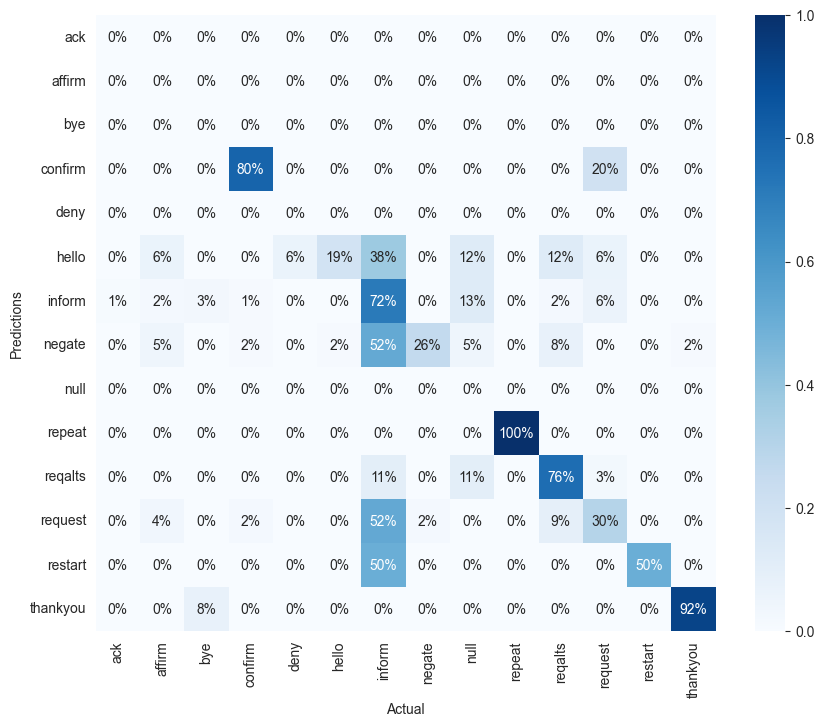

              precision    recall  f1-score   support

         ack       0.00      0.00      0.00         3
      affirm       0.00      0.00      0.00        24
         bye       0.00      0.00      0.00         9
     confirm       0.80      0.24      0.36        17
        deny       0.00      0.00      0.00         1
       hello       0.19      0.60      0.29         5
      inform       0.72      0.45      0.55       447
      negate       0.26      0.68      0.38        25
        null       0.00      0.00      0.00        46
      repeat       1.00      1.00      1.00         1
     reqalts       0.76      0.38      0.50        77
     request       0.30      0.85      0.44       135
     restart       0.50      1.00      0.67         1
    thankyou       0.92      0.92      0.92        13

    accuracy                           0.48       804
   macro avg       0.39      0.44      0.37       804
weighted avg       0.56      0.48      0.47       804



/Users/karolrogozinski/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/karolrogozinski/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/karolrogozinski/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [49]:
plt.figure(figsize=(10, 8))

class_names = np.unique(y_test)
matrix = confusion_matrix(preds, y_test, normalize='true')
sns.heatmap(matrix, annot=True, fmt=".0%", cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Actual')
plt.ylabel('Predictions')

plt.show()

print(classification_report(y_test, preds, target_names=class_names, digits=2))